In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Acropolis'
raceDate = '05-08/09/2024'
surface = 'Gravel'
competition = 'WRC'

link = 'https://www.ewrc-results.com/results/85535-eko-acropolis-rally-2024/?s='
startat, no_ss=460165, int(15)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []
overall_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data1 = pd.read_html(page_html11)[1]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data1.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','total_time', 'Diff', 'Speed']
    data['ss']=ss+1
    data1['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    equal = '=' in data1['Pos.'].unique()
    if equal:
        data1['Pos.'] = data1['Pos.'].replace('=', method='ffill')
        data1['Pos.'] = data1['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data1)
    rally_23.append(data) 
    overall_23.append(data1)

C:\Users\ilias\AppData\Local\Temp\ipykernel_20656\3609136228.py:18: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_20656\3609136228.py:22: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data1['Pos.'] = data1['Pos.'].replace('=', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_20656\3609136228.py:18: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_20656\3609136228.py:18: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_20656\3609

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally_overall = pd.concat(overall_23, axis=0)
rally_overall.tail(50)

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss
18,19. +1,#58,Jürgenson Romet - Oja Siim Ford Fiesta Rally3,RC3,3:50:00.1,+22:57.1 +1:14.6,74.9 4.80,14
19,20. +4,#33,Evans Elfyn - Martin Scott Toyota GR Yaris Ral...,RC1 M,3:51:55.1,+24:52.1 +1:55.0,74.3 5.20,14
20,21.,#45,Granados Miguel - Martí Marc Škoda Fabia RS Ra...,RC2,3:52:16.9,+25:13.9 +21.8,74.1 5.27,14
21,22. +1,#64,Rensonnet Tom - Deliot Manon Ford Fiesta Rally3,RC3,3:53:13.9,+26:10.9 +57.0,73.8 5.47,14
22,23. +5,#16,Fourmaux Adrien - Coria Alexandre Ford Puma Ra...,RC1 M,3:57:17.1,+30:14.1 +4:03.2,72.6 6.32,14
23,24. +3,#68,Caparó Jose - Gutiérrez Esther Ford Fiesta Rally3,RC3,3:58:47.6,+31:44.6 +1:30.5,72.1 6.64,14
24,25. +1,#22,Joona Lauri - Mannisenmäki Ville Škoda Fabia R...,RC2,3:59:32.7 0:10,+32:29.7 +45.1,71.9 6.79,14
25,26. −1,#44,Soylu Uğur - Guray Sener Škoda Fabia RS Rally2,RC2,3:59:37.5,+32:34.5 +4.8,71.9 6.81,14
26,27. +2,#61,Türkkan Ali - Erdener Burak Ford Fiesta Rally3...,RC3,3:59:51.6,+32:48.6 +14.1,71.8 6.86,14
27,28. +2,#53,Halkias Efthimios - Komnos Nikos Renault Clio ...,RC3,4:01:05.9 0:20,+34:02.9 +1:14.3,71.5 7.12,14


In [10]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally_overall['Pos.'] = rally_overall['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally_overall['Race'] = rallyname
rally_overall['date'] = raceDate
rally_overall['surface'] = surface
rally_overall['competition'] = competition
rally_overall['Crew'] = rally_overall['Crew'].str[:10]
rally_overall['Gr/Cl'] = rally_overall['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally_overall['cPos']= rally_overall.groupby(['Race', 'ss']).cumcount()+1
rally_overall[['Stages_time', 'Penalty']] = rally_overall['total_time'].str.split(' ', expand=True)
'''rally_overall['Stages_t_s'], rally_overall['Stages_t_m'], rally_overall['Stages_t_h']= rally_overall['Stages_time'].str[-5:], rally_overall['Stages_time'].str[-8:-6].astype(int), rally_overall['Stages_time'].str[:-9]
rally_overall['Penalty_m'], rally_overall['Penalty_s'] = rally_overall['Penalty'].str[:-3], rally_overall['Penalty'].str[-2:]
rally_overall[['Diff_1st', 'Diff_Pre']] = rally_overall['Diff'].str.split(' +', expand=True)
rally_overall['Diff_1st'] = rally_overall['Diff_1st'].str.replace('+', '')
rally_overall = rally_overall.replace('',0)
rally_overall.fillna(0, inplace=True)
cols = ['Stages_t_h', 'Stages_t_m', 'Stages_t_s', 'Penalty_m', 'Penalty_s']
rally_overall[cols] = rally_overall[cols].apply(pd.to_numeric, errors='coerce', axis=1)
rally_overall['time'] = rally_overall['Stages_t_s'] +  rally_overall['Stages_t_m'] *60 + rally_overall['Stages_t_h'] *3600
'''
rally_overall.to_csv('trialData.csv', index=False)

rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#17,Ogier Sébastie,RC1,16:33.2,-,81.4,1,Acropolis,05-08/09/2024,Gravel,WRC,1
1,2,#8,Tänak Ott - Jä,RC1,16:33.8,+0.6 +0.6,81.4 0.03,1,Acropolis,05-08/09/2024,Gravel,WRC,2
2,3,#16,Fourmaux Adrie,RC1,16:34.0,+0.8 +0.2,81.4 0.04,1,Acropolis,05-08/09/2024,Gravel,WRC,3
3,4,#18,Katsuta Takamo,RC1,16:35.9,+2.7 +1.9,81.2 0.12,1,Acropolis,05-08/09/2024,Gravel,WRC,4
4,5,#6,Sordo Dani - C,RC1,16:42.5,+9.3 +6.6,80.7 0.41,1,Acropolis,05-08/09/2024,Gravel,WRC,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,40,#60,Domínguez Dieg,RC3,2:21.4,+36.8 +7.7,50.2 18.7,12,Acropolis,05-08/09/2024,Gravel,WRC,40
40,41,#68,Caparó Jose -,RC3,2:45.2,+1:00.6 +23.8,42.9 30.8,12,Acropolis,05-08/09/2024,Gravel,WRC,41
41,42,#59,Gill Taylor -,RC3,3:40.4,+1:55.8 +55.2,32.2 58.8,12,Acropolis,05-08/09/2024,Gravel,WRC,42
42,43,#13,Munster Grégoi,RC1,11:44.6 [N],+10:00.0 +8:04.2,10.1 304.6,12,Acropolis,05-08/09/2024,Gravel,WRC,43


In [11]:
rally_overall

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss,Race,date,surface,competition,cPos,Stages_time,Penalty
0,1.0,#17,Ogier Séba,RC1,16:33.2,NaN,81.4,1,Acropolis,05-08/09/2024,Gravel,WRC,1,16:33.2,None
1,2.0,#8,Tänak Ott,RC1,16:33.8,+0.6 +0.6,81.4 0.03,1,Acropolis,05-08/09/2024,Gravel,WRC,2,16:33.8,None
2,3.0,#16,Fourmaux A,RC1,16:34.0,+0.8 +0.2,81.4 0.04,1,Acropolis,05-08/09/2024,Gravel,WRC,3,16:34.0,None
3,4.0,#18,Katsuta Ta,RC1,16:35.9,+2.7 +1.9,81.2 0.12,1,Acropolis,05-08/09/2024,Gravel,WRC,4,16:35.9,None
4,5.0,#6,Sordo Dani,RC1,16:42.5,+9.3 +6.6,80.7 0.41,1,Acropolis,05-08/09/2024,Gravel,WRC,5,16:42.5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,40. +6,#36,Vasilakis,RC2,3:43:40.1,+42:33.8 +4.2,67.4 10.2,12,Acropolis,05-08/09/2024,Gravel,WRC,40,3:43:40.1,None
40,41. +7,#60,Domínguez,RC3,3:44:09.5,+43:03.2 +29.4,67.3 10.3,12,Acropolis,05-08/09/2024,Gravel,WRC,41,3:44:09.5,None
41,42. −5,#13,Munster Gr,RC1,3:45:43.3 1:20,+44:37.0 +1:33.8,67.2 10.7,12,Acropolis,05-08/09/2024,Gravel,WRC,42,3:45:43.3,1:20
42,43. +7,#81,Lefkaditis,RC4,3:51:34.3,+50:28.0 +5:51.0,65.1 12.1,12,Acropolis,05-08/09/2024,Gravel,WRC,43,3:51:34.3,None


In [12]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")

In [16]:
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#17,Ogier Sébastie,RC1,16:33.2,-,81.4,1,Acropolis,05-08/09/2024,Gravel,WRC,1
1,2,#8,Tänak Ott - Jä,RC1,16:33.8,+0.6 +0.6,81.4 0.03,1,Acropolis,05-08/09/2024,Gravel,WRC,2
2,3,#16,Fourmaux Adrie,RC1,16:34.0,+0.8 +0.2,81.4 0.04,1,Acropolis,05-08/09/2024,Gravel,WRC,3
3,4,#18,Katsuta Takamo,RC1,16:35.9,+2.7 +1.9,81.2 0.12,1,Acropolis,05-08/09/2024,Gravel,WRC,4
4,5,#6,Sordo Dani - C,RC1,16:42.5,+9.3 +6.6,80.7 0.41,1,Acropolis,05-08/09/2024,Gravel,WRC,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,40,#60,Domínguez Dieg,RC3,2:21.4,+36.8 +7.7,50.2 18.7,12,Acropolis,05-08/09/2024,Gravel,WRC,40
40,41,#68,Caparó Jose -,RC3,2:45.2,+1:00.6 +23.8,42.9 30.8,12,Acropolis,05-08/09/2024,Gravel,WRC,41
41,42,#59,Gill Taylor -,RC3,3:40.4,+1:55.8 +55.2,32.2 58.8,12,Acropolis,05-08/09/2024,Gravel,WRC,42
42,43,#13,Munster Grégoi,RC1,11:44.6 [N],+10:00.0 +8:04.2,10.1 304.6,12,Acropolis,05-08/09/2024,Gravel,WRC,43


In [13]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv( str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages

ValueError: Columns must be same length as key

In [7]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

KeyError: 'Column not found: time_SS_sec'

In [10]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

NameError: name 'min_value2_G' is not defined

In [11]:
Group = 'ALL'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
#ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC.to_csv('test2a.csv')

NameError: name 'ss_times_F' is not defined

In [12]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

NameError: name 'ss_times_WRC' is not defined

NameError: name 'ss_times_F4' is not defined

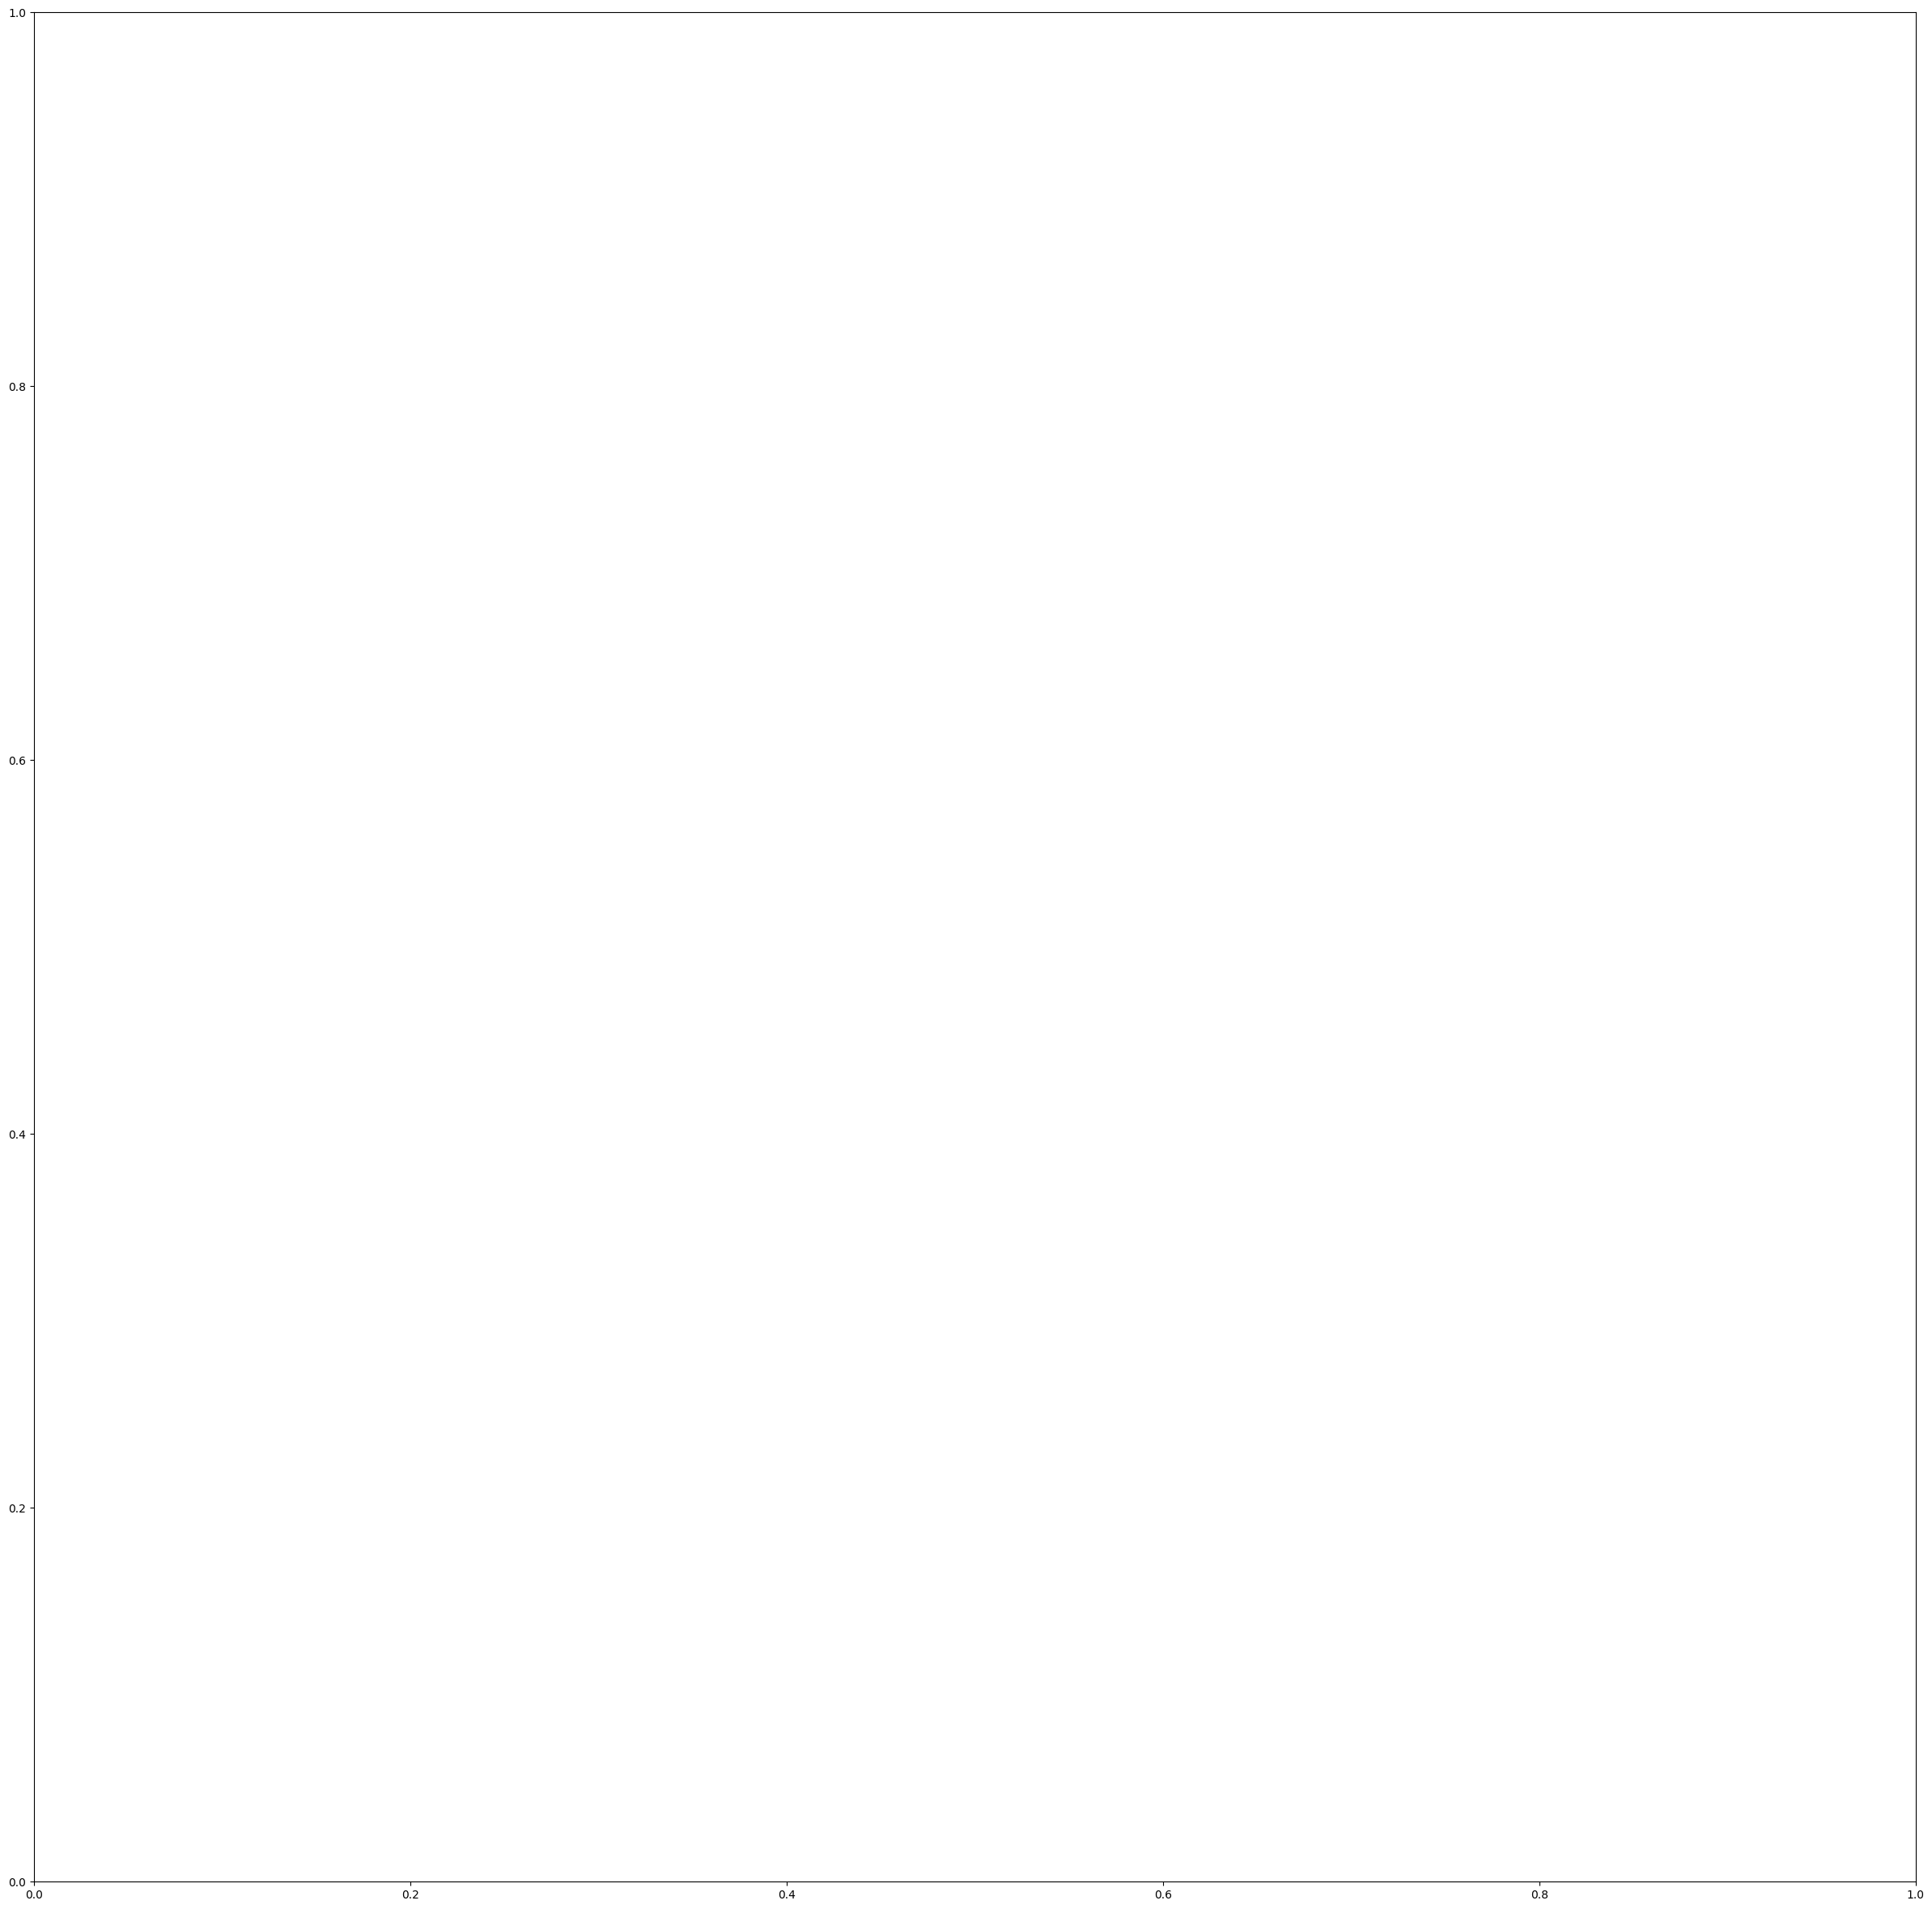

In [13]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + rallyname + ".png")
plt.show()

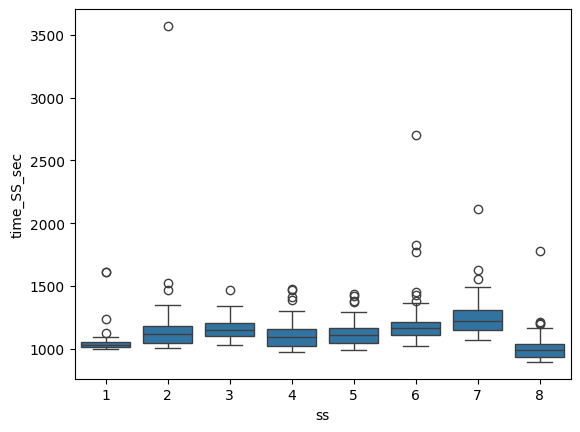

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + rallyname + Group + ".png")

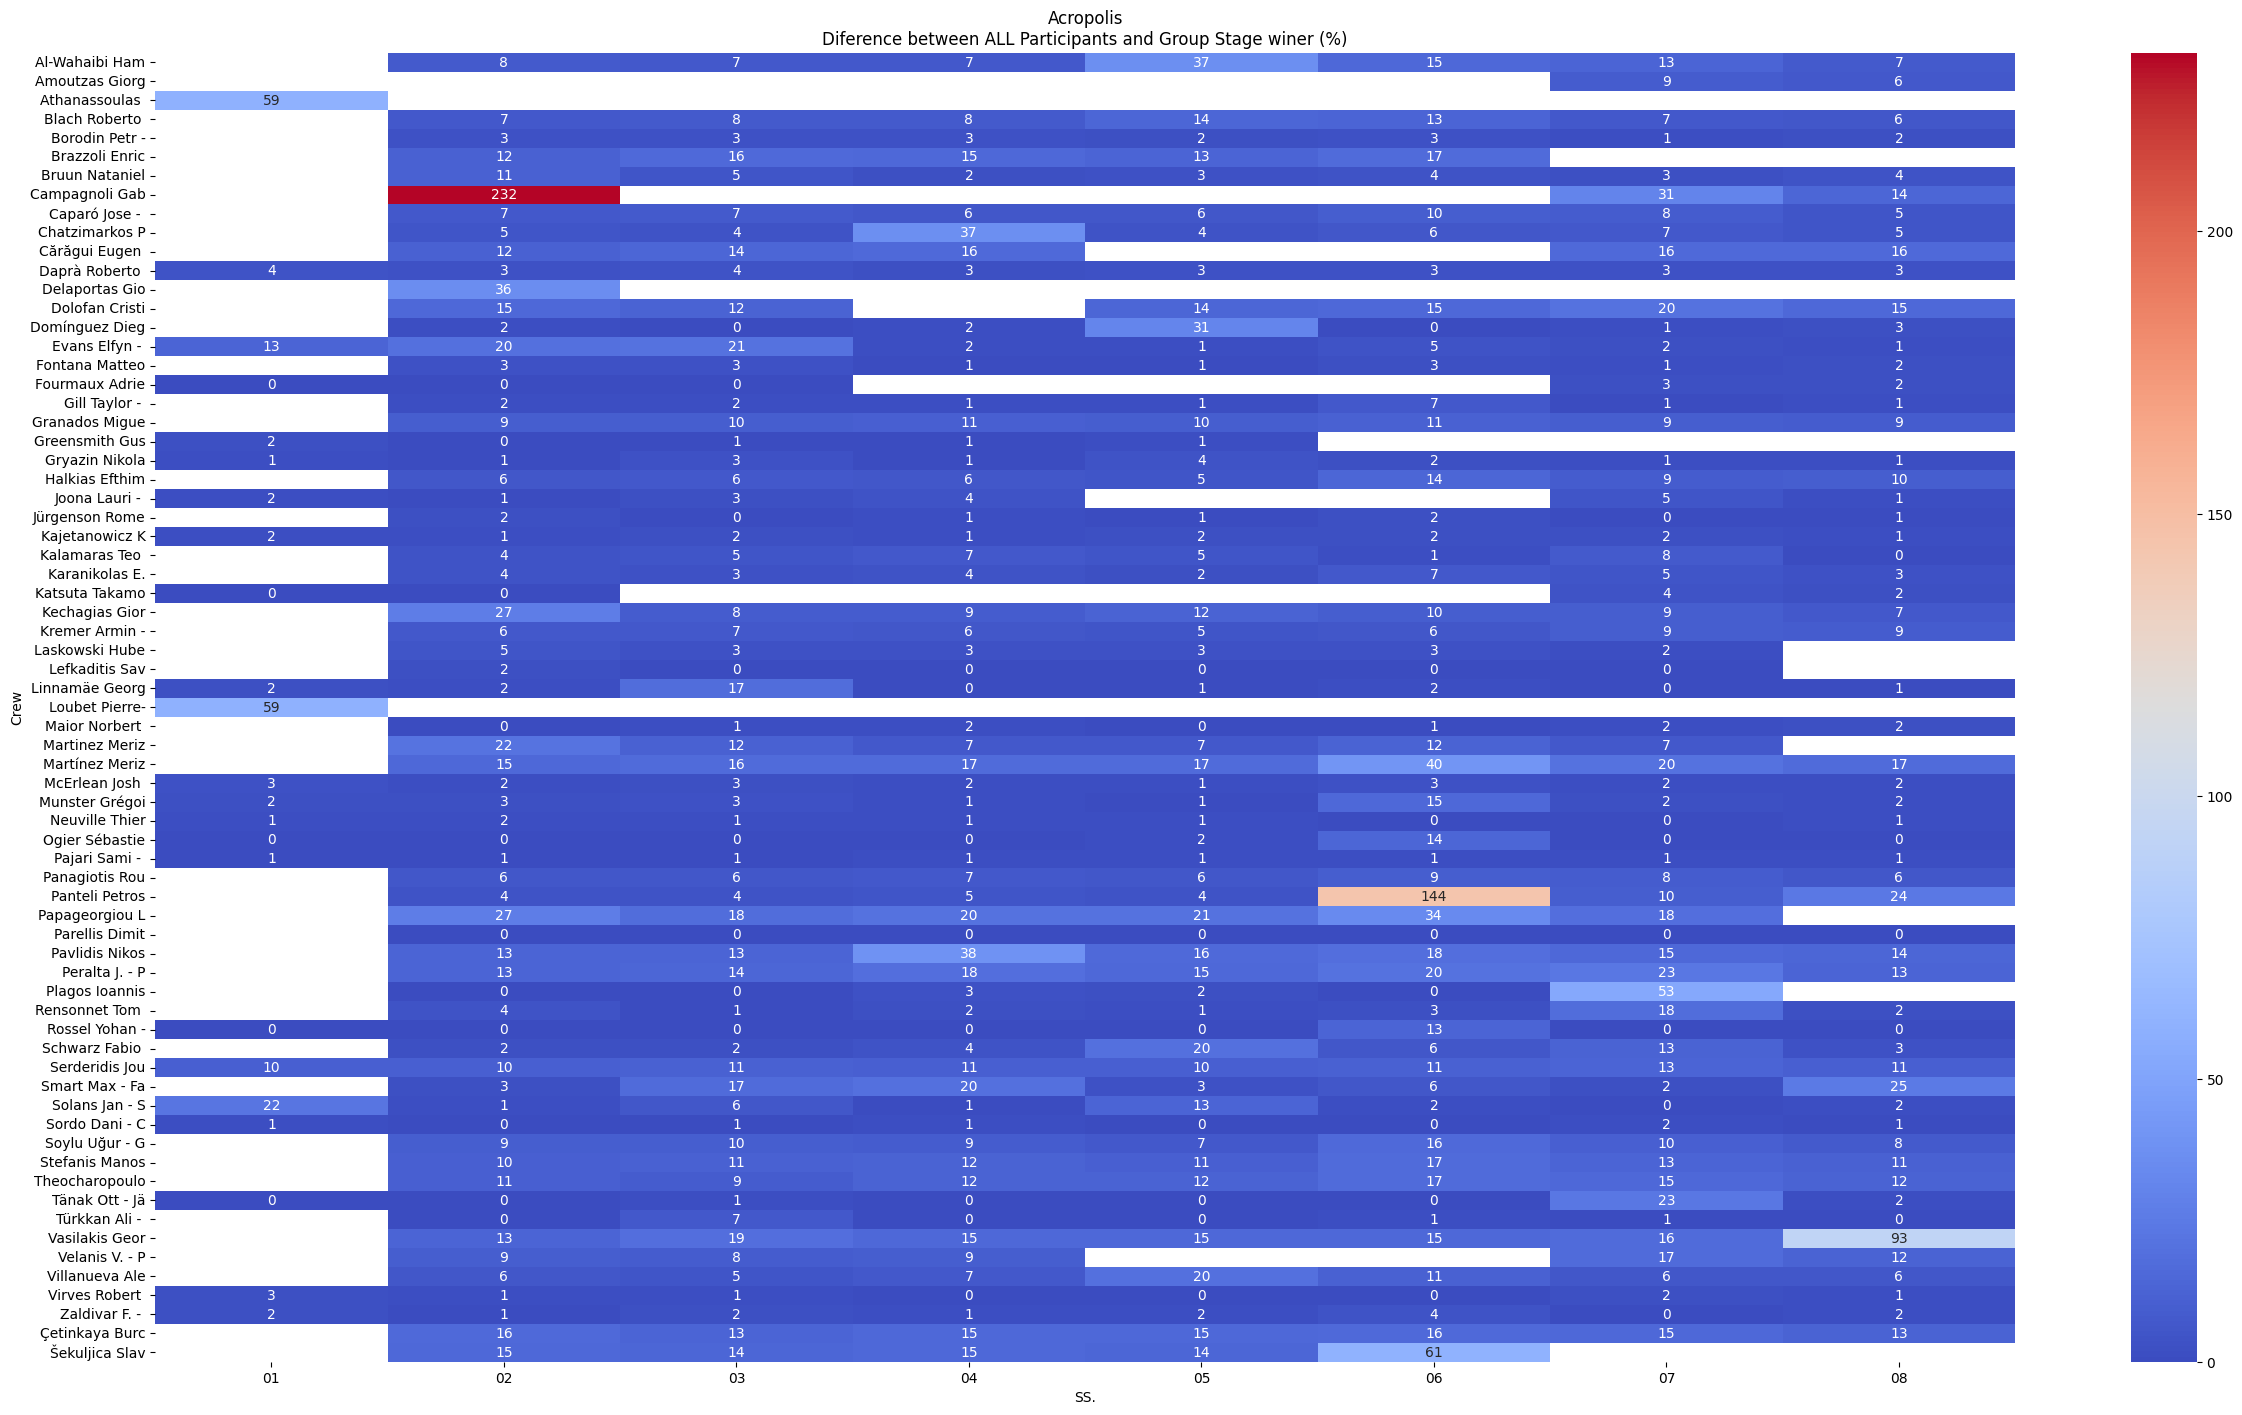

In [18]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
plt.savefig(rallyname + Group + ".png")
plt.show()

In [19]:
ss_times_FIXED = ss_times_WRC.drop(ss_times_WRC[ss_times_WRC['time_SS_sec']>=1.2*ss_times_WRC['min_time_Gr']].index)
ss_times_FIXED
#ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Ogier Sébastie,RC1,1,Acropolis,05-08/09/2024,Gravel,WRC,1,993.2,993.2,993.2,0.0,0.0,0.000000,01
1,Tänak Ott - Jä,RC1,1,Acropolis,05-08/09/2024,Gravel,WRC,2,993.8,993.2,993.2,0.6,0.6,0.060411,01
2,Fourmaux Adrie,RC1,1,Acropolis,05-08/09/2024,Gravel,WRC,3,994.0,993.2,993.2,0.8,0.8,0.080548,01
3,Katsuta Takamo,RC1,1,Acropolis,05-08/09/2024,Gravel,WRC,4,995.9,993.2,993.2,2.7,2.7,0.271849,01
4,Sordo Dani - C,RC1,1,Acropolis,05-08/09/2024,Gravel,WRC,5,1002.5,993.2,993.2,9.3,9.3,0.936367,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,Martinez Meriz,RC3,8,Acropolis,05-08/09/2024,Gravel,WRC,59,NaN,967.8,893.9,NaN,NaN,NaN,08
524,Laskowski Hube,RC3,8,Acropolis,05-08/09/2024,Gravel,WRC,60,NaN,967.8,893.9,NaN,NaN,NaN,08
525,Lefkaditis Sav,RC4,8,Acropolis,05-08/09/2024,Gravel,WRC,61,NaN,1167.8,893.9,NaN,NaN,NaN,08
526,Plagos Ioannis,RC4,8,Acropolis,05-08/09/2024,Gravel,WRC,62,NaN,1167.8,893.9,NaN,NaN,NaN,08


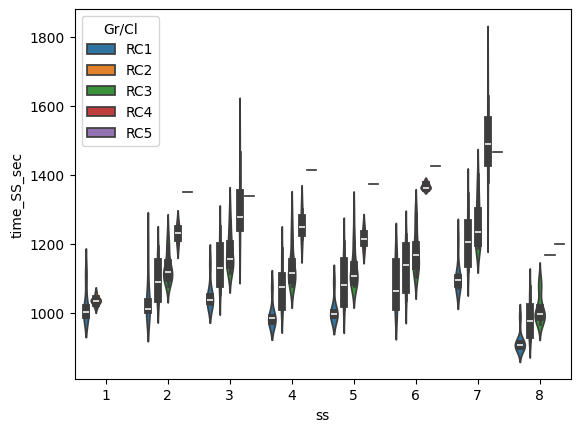

In [20]:
sns.violinplot(y=ss_times_FIXED['time_SS_sec'], x=ss_times_FIXED['ss'],hue=ss_times_FIXED['Gr/Cl'])
plt.savefig(rallyname + '_violinplot.png')

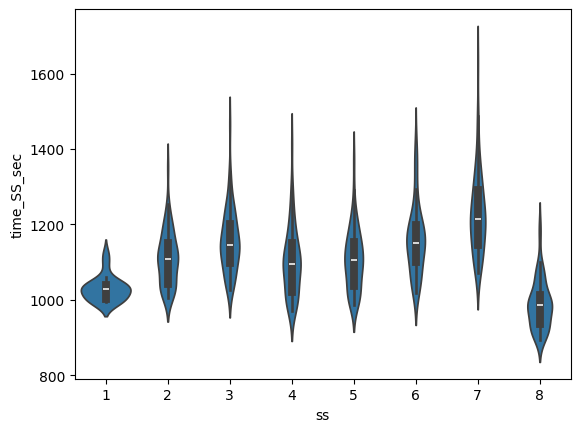

In [21]:
#sns.boxplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
sns.violinplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
plt.savefig(rallyname + '_violinplot_FIXED.png')

In [22]:
Agioi = ss_times_FIXED[(ss_times_FIXED["ss"] % 2 ==1) & (ss_times_FIXED["ss"] < 5)]
Pisia = ss_times_FIXED[ss_times_FIXED["ss"] % 2 == 0]
#Moschopodi = ss_times_FIXED[ss_times_FIXED["ss"] == 5]

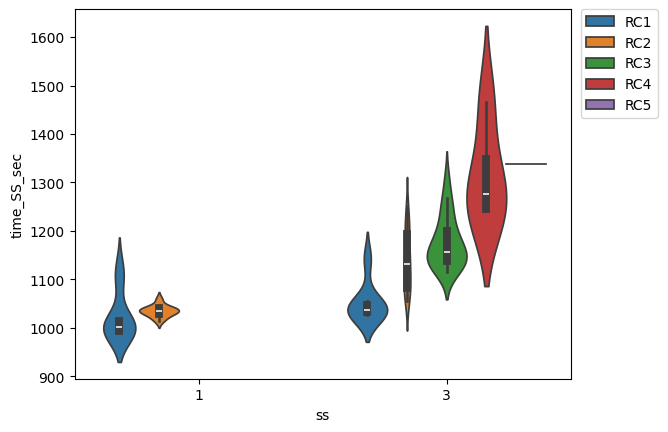

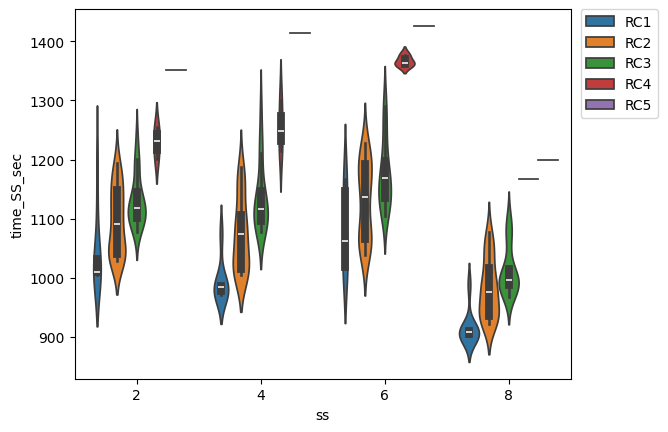

'fig.set_size_inches(30,25)\nsns.violinplot( y=Moschopodi["time_SS_sec"], x=Moschopodi["ss"], hue = Moschopodi["Gr/Cl"])\nplt.legend(bbox_to_anchor=(1.02, 1), loc=\'upper left\', borderaxespad=0)\nplt.savefig(rallyname + \'_Moschopodi_violinnplot.png\')\n'

In [23]:
fig.set_size_inches(20,15)
sns.violinplot( y=Agioi["time_SS_sec"], x=Agioi["ss"], hue = Agioi["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Agioi_violinplot.png')
plt.show()
fig.set_size_inches(30,20)
sns.violinplot( y=Pisia["time_SS_sec"], x=Pisia["ss"], hue = Pisia["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Pisia_violinnplot.png')
plt.show()
'''fig.set_size_inches(30,25)
sns.violinplot( y=Moschopodi["time_SS_sec"], x=Moschopodi["ss"], hue = Moschopodi["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Moschopodi_violinnplot.png')
'''

In [19]:
Group = 'C1 - C2'
#ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6.to_csv(str(rallyname) + str(Group) + '.csv')
#ss_times_WRC.to_csv('test2a.csv')

In [20]:
ss_times_C6_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_C6_F4 = pd.pivot_table(ss_times_C6_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_C6_F4

SS.,01,02,03
Crew,,,
Al-Wahaibi Ham,NaN,82.5,NaN
Blach Roberto,NaN,73.7,NaN
Brazzoli Enric,NaN,118.8,NaN
Cărăgui Eugen,NaN,120.5,NaN
Daprà Roberto,44.7,35.7,NaN
Dolofan Cristi,NaN,155.1,NaN
Evans Elfyn -,129.6,198.8,212.8
Fourmaux Adrie,0.8,4.1,4.9
Granados Migue,NaN,93.6,NaN


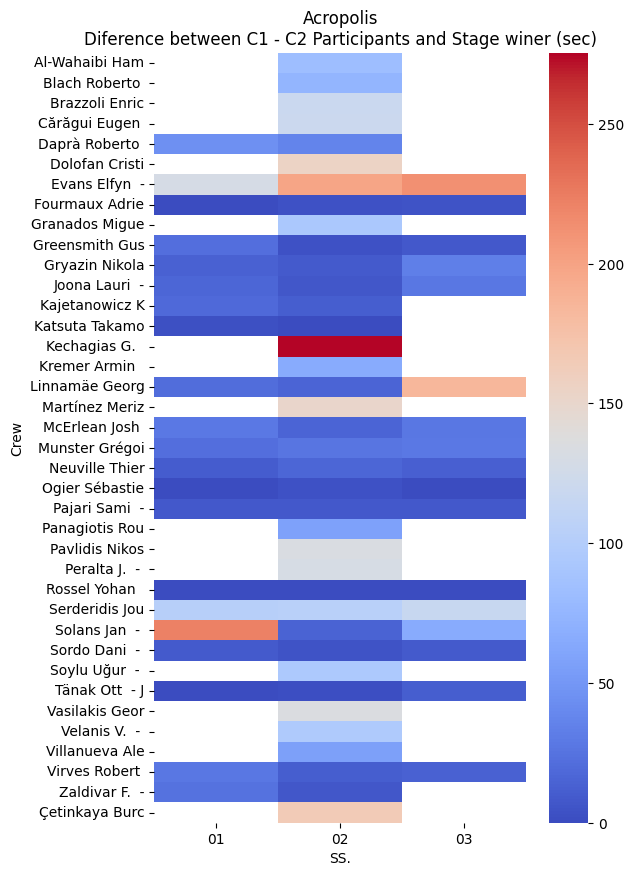

In [21]:
fig,ax = plt.subplots()
fig.set_size_inches(6,10)
Heatmap_ALL = sns.heatmap(ss_times_C6_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")
plt.show()

In [22]:
min_value_overall = rally_overall.groupby(['Race', 'ss'])['time'].min()
min_value_overall_G = rally_overall.groupby(['Race', 'ss', 'Gr/Cl'])['time'].min()
#min_value = pd.DataFrame(min_value)

min_value_overall_2 =  pd.DataFrame(min_value_overall)
min_value_overall_2_G =  pd.DataFrame(min_value_overall_G)

min_value_overall_2_G = min_value_overall_2_G.rename(columns={'time' : 'min_time_Gr'})
min_value_overall_2 = min_value_overall_2.rename(columns={'time' : 'min_time'})
min_value_overall_2_G

KeyError: 'Column not found: time'

In [23]:
ss_times_F_G_overall = rally_overall.merge(min_value_overall_2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F_overall = ss_times_F_G_overall.merge(min_value2, on=['Race', 'ss'])
ss_times_F_overall['diff']=ss_times_F_overall['time'] - ss_times_F_overall['min_time']
ss_times_F_overall['diff_G']=ss_times_F_overall['time'] - ss_times_F_overall['min_time_Gr']
ss_times_F_overall['diff_G%']=(ss_times_F_overall['time'] - ss_times_F_overall['min_time_Gr'])/ss_times_F_overall['min_time_Gr']*100
ss_times_F_overall['SS.']=ss_times_F_overall['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F_overall

NameError: name 'min_value_overall_2_G' is not defined

In [24]:
Group = 'C'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_combine = ss_times_F_overall[ss_times_F_overall['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
ss_times_combine.to_csv(str(rallyname) + str(Group) + '_classification.csv')
ss_times_combine.columns

NameError: name 'ss_times_F_overall' is not defined

In [25]:
ss_times_F3_overall =ss_times_combine.drop(['Gr/Cl','time','cPos', 'ss'], axis=1)
ss_times_F4_group = pd.pivot_table(ss_times_F3_overall, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4_overall = pd.pivot_table(ss_times_F3_overall, values='diff', index='Crew', columns=['SS.'])
ss_times_F4_overall

NameError: name 'ss_times_combine' is not defined

NameError: name 'ss_times_F4_overall' is not defined

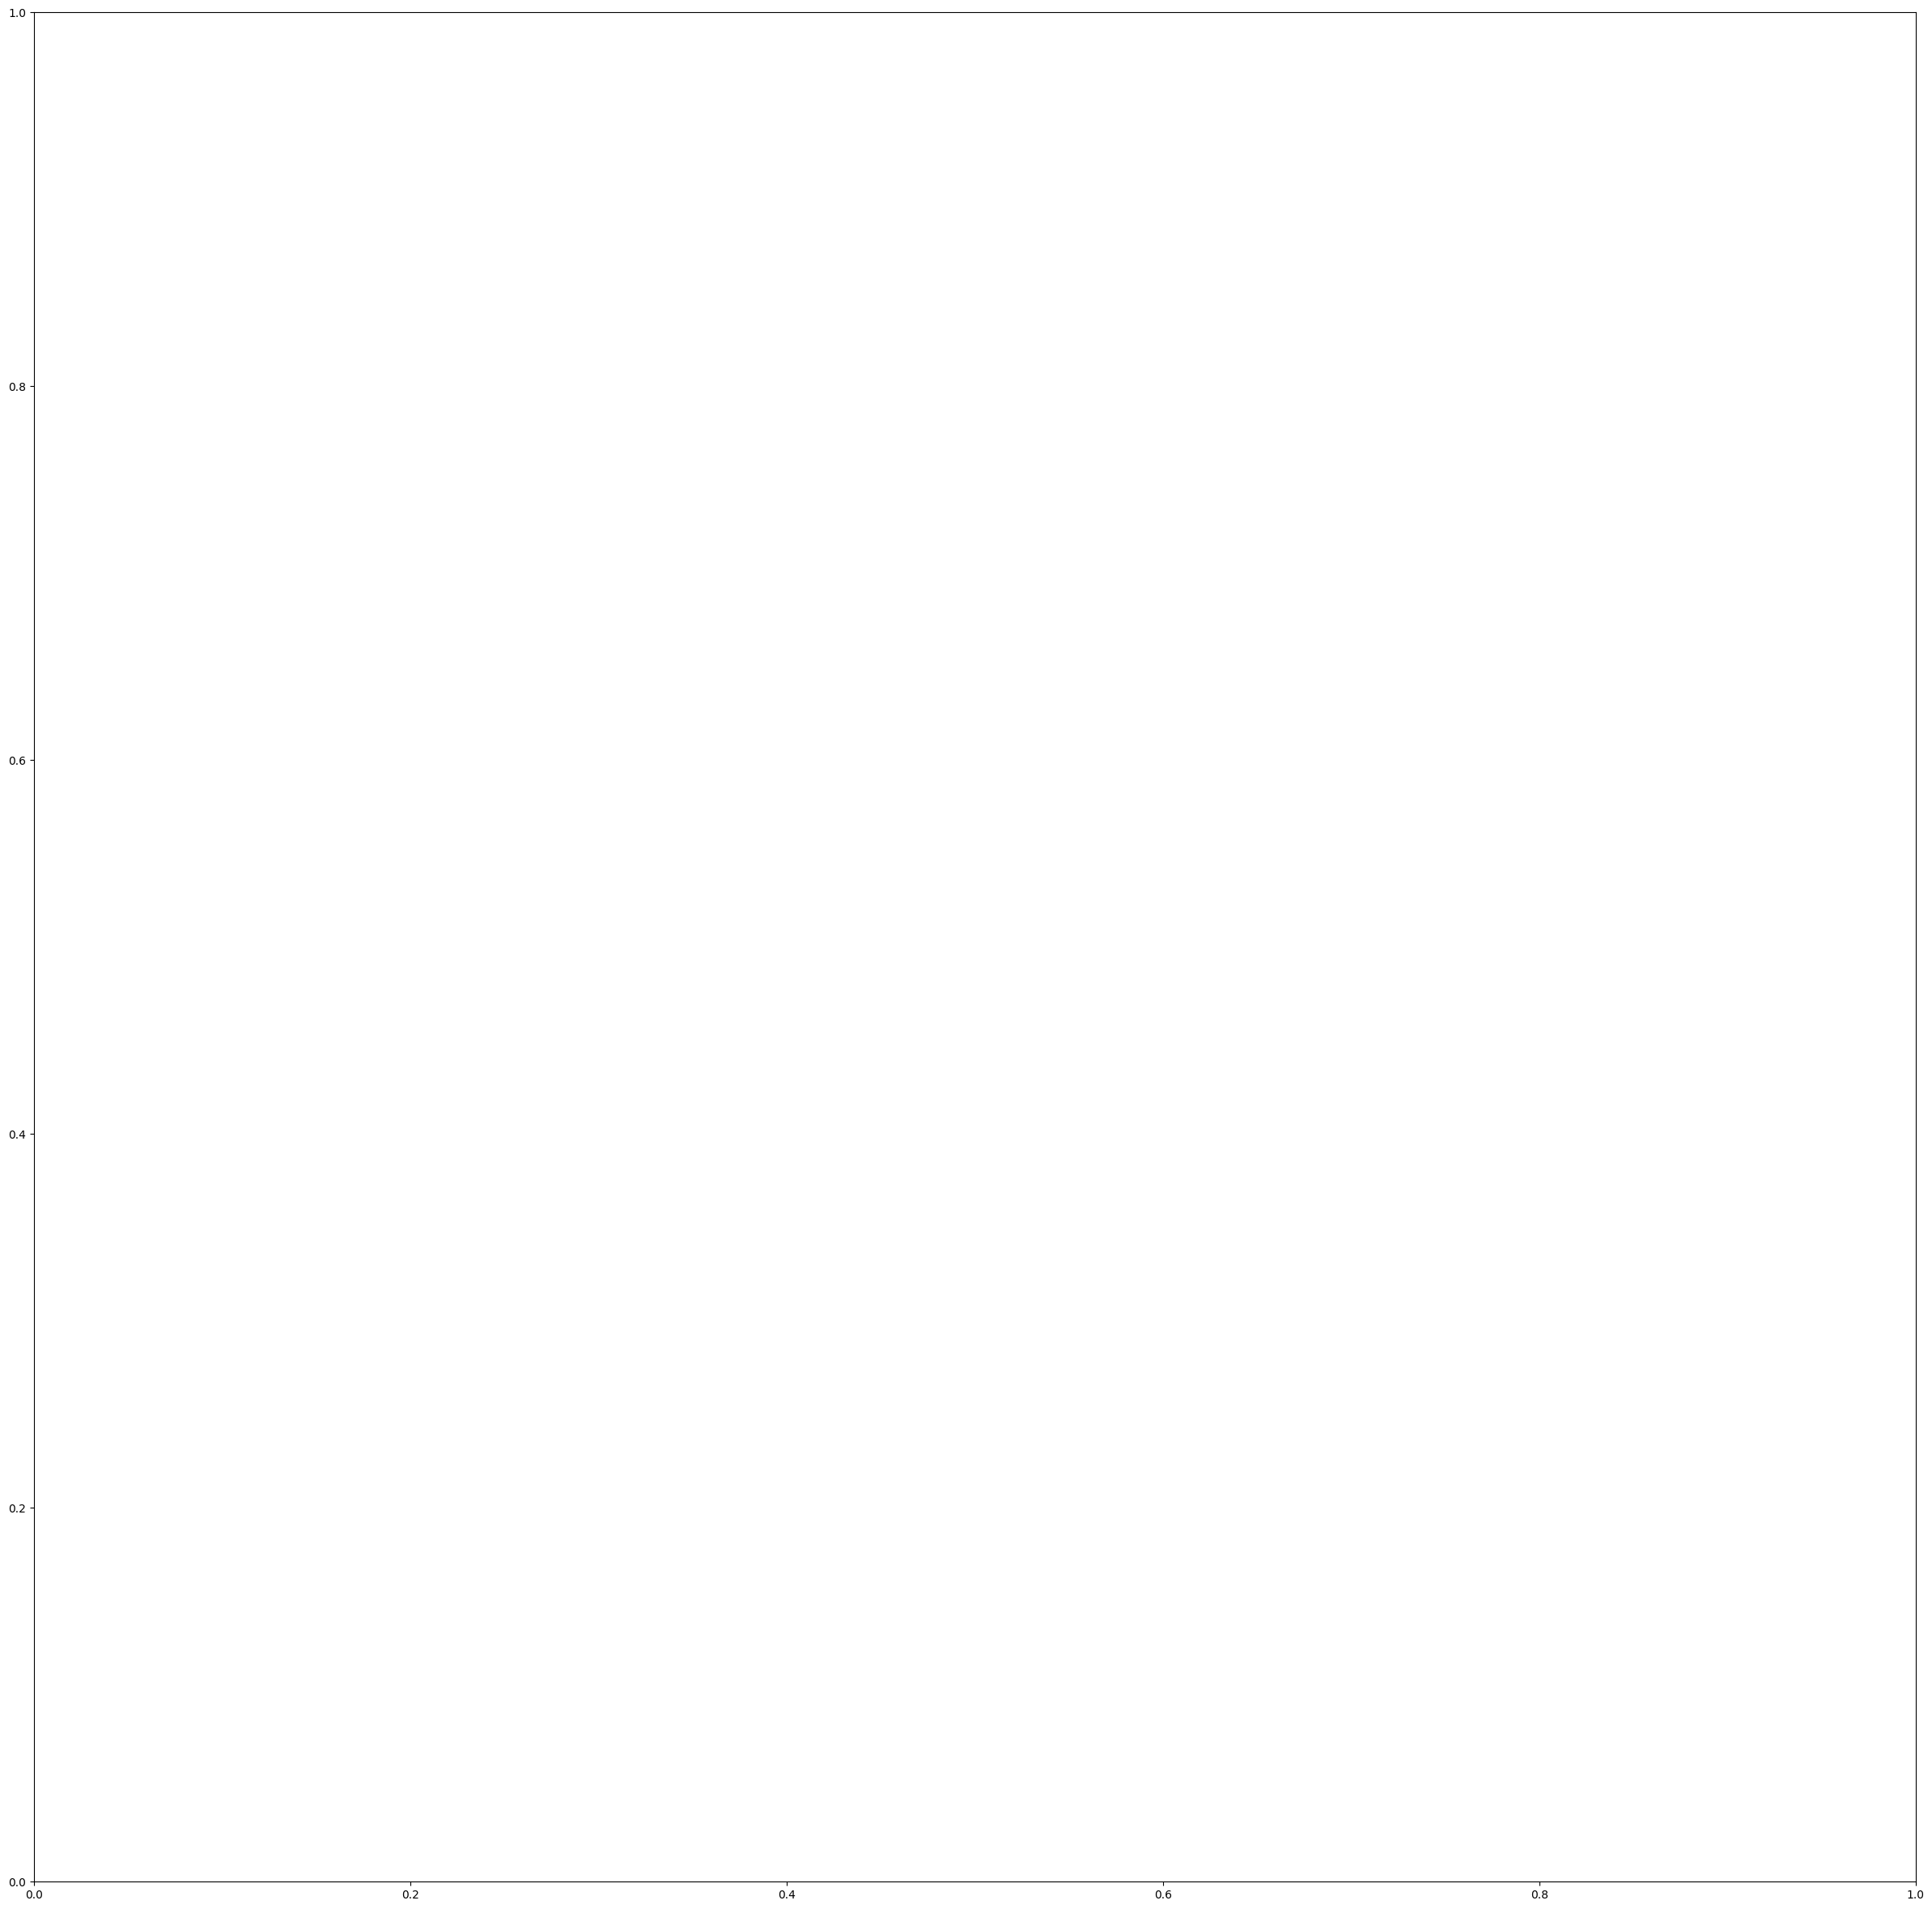

In [26]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4_overall, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants in Classification (sec)')
plt.savefig("Classification_Heatmap_" + Group + rallyname + ".png")
plt.show()

NameError: name 'ss_times_F4_group' is not defined

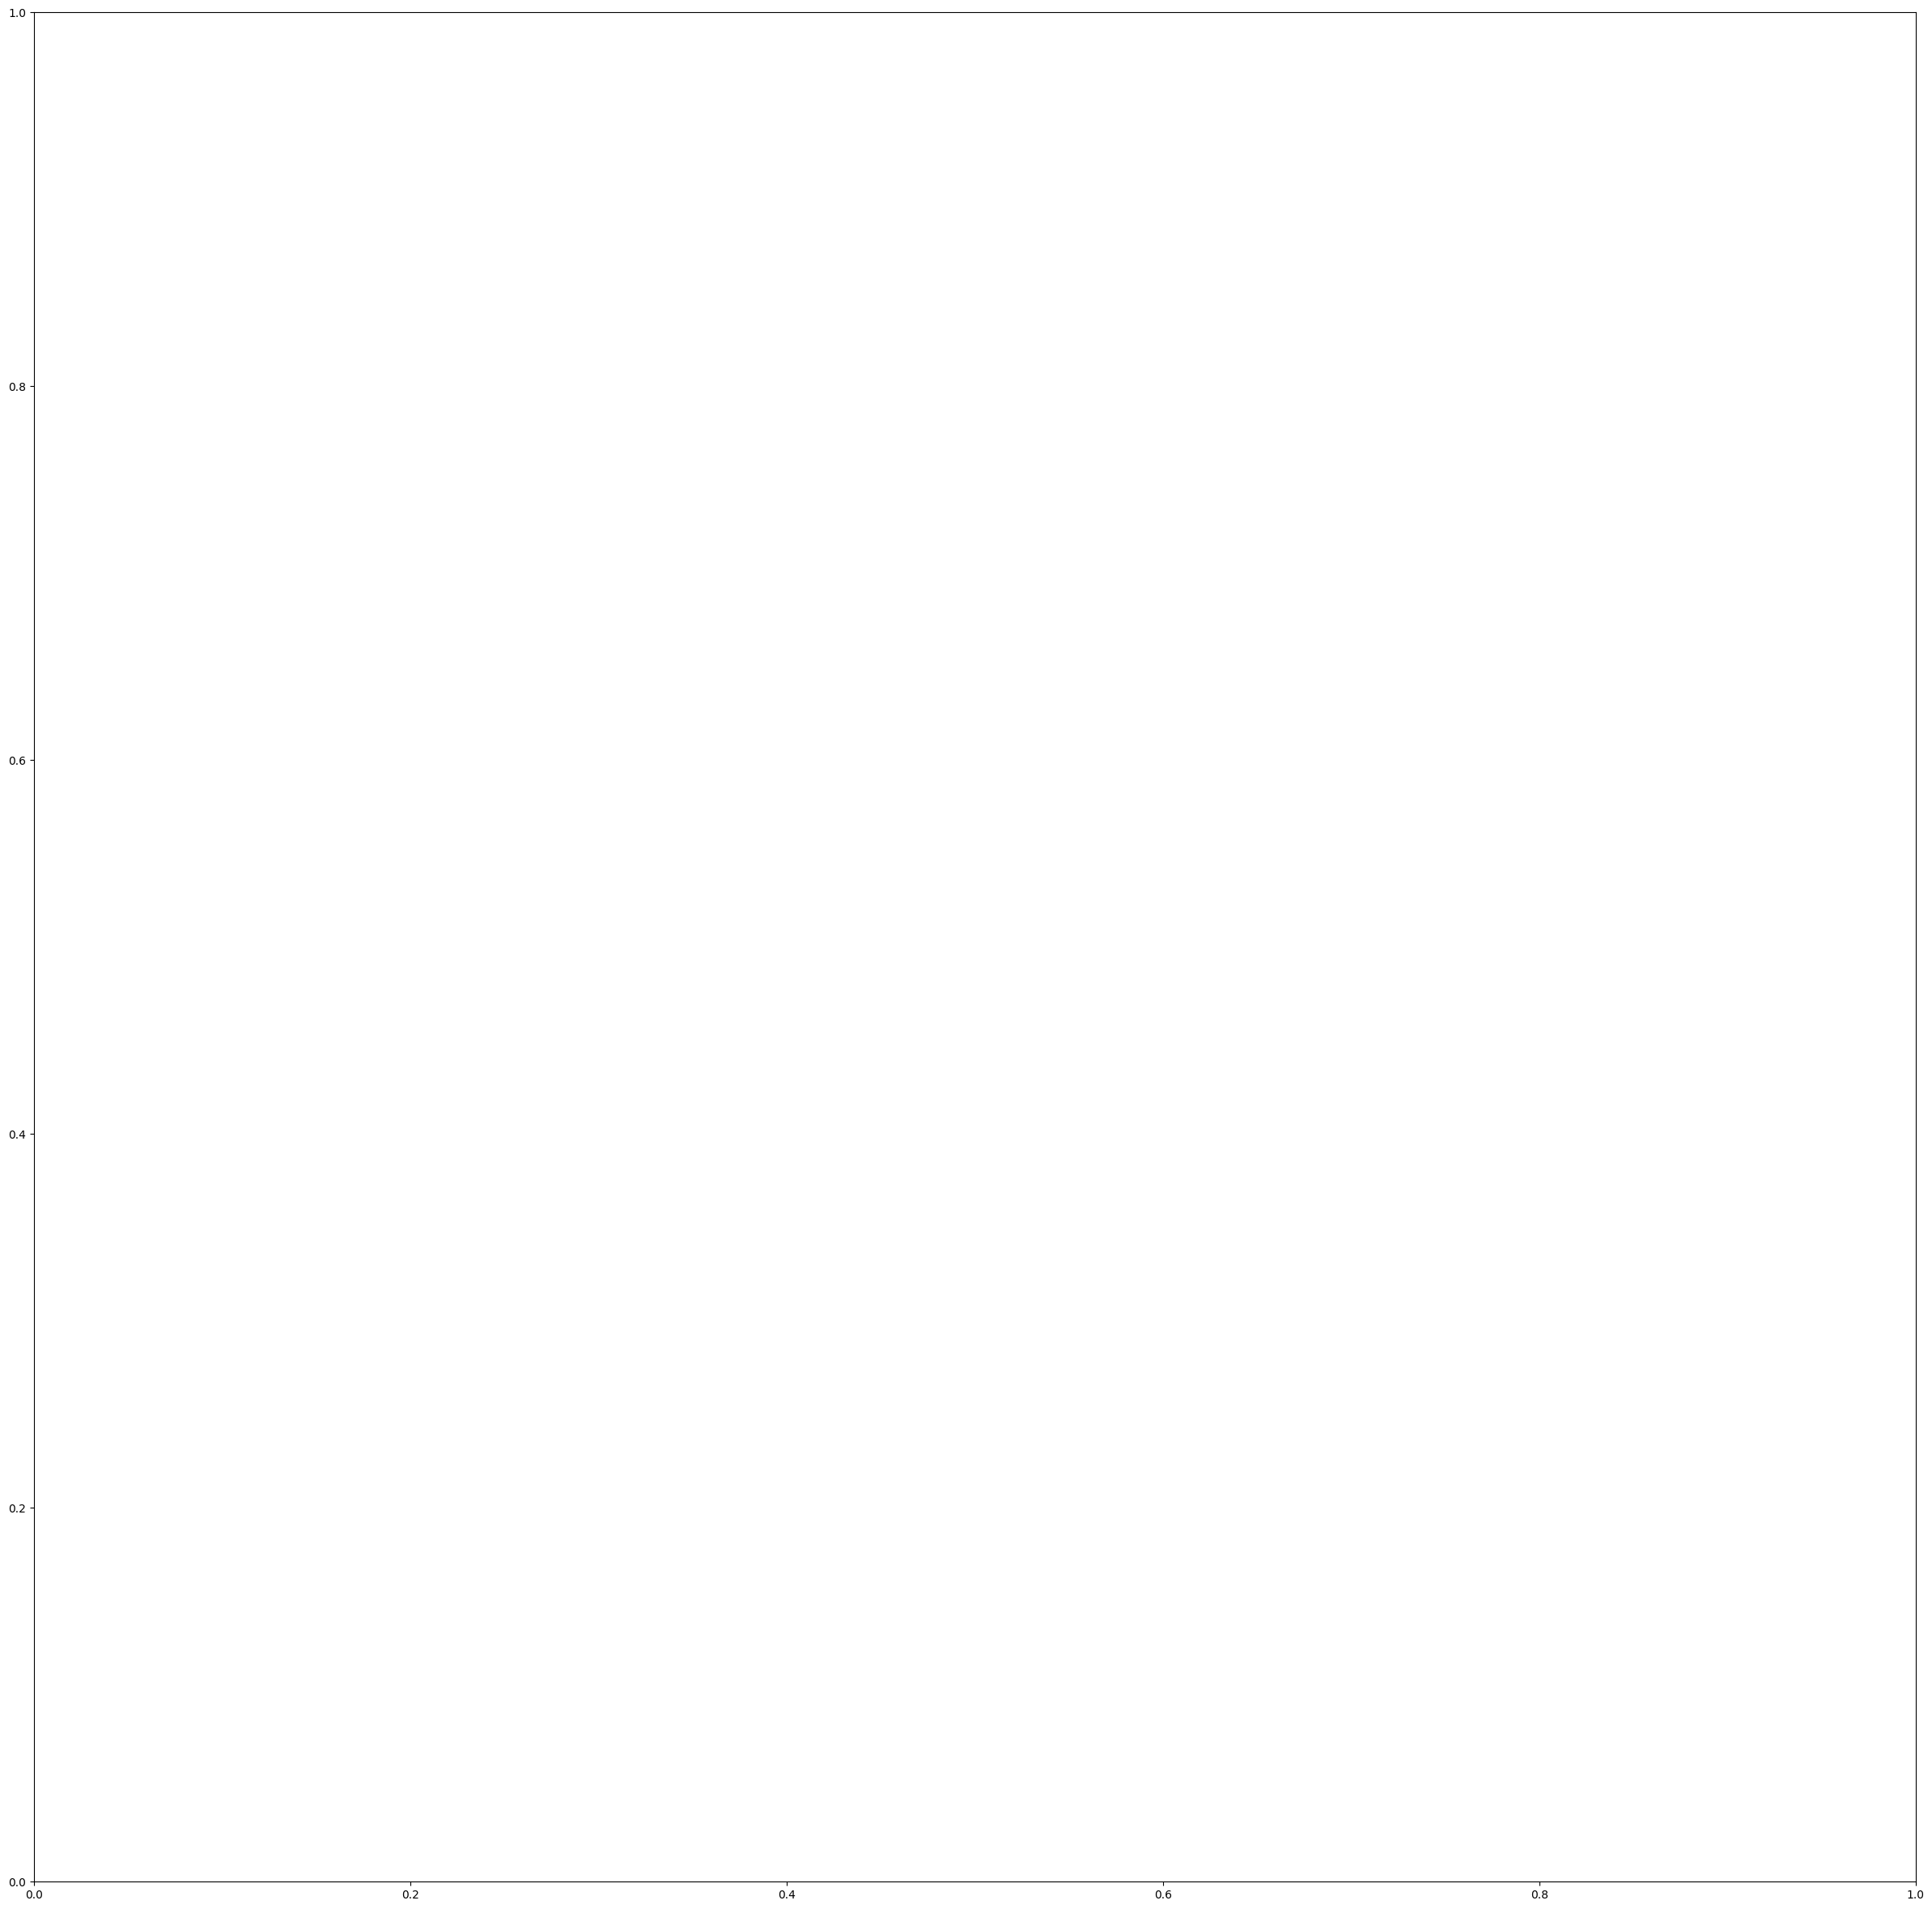

In [27]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4_group, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants in Classification (sec)')
plt.savefig("Classification_Heatmap_Group" + Group + rallyname + ".png")
plt.show()